# Step 1: Importing the dataset





In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tanishkaachaturvedi","key":"28a5616dcdfb6873d722345fcfd2e102"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 AlexNetModel.hdf5     data		  kaggle.json			   sample_data
 best_weights_9.hdf5  'kaggle (1).json'   new-plant-diseases-dataset.zip


In [ ]:
import zipfile
path='data/plant'
with zipfile.ZipFile('new-plant-diseases-dataset.zip','r') as z:
  z.extractall(path)

In [ ]:
!ls "/content/data"

In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_gen = image_dataset_from_directory(directory="/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(224, 224))
test_gen = image_dataset_from_directory(directory="/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(224, 224))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 49865 files belonging to 27 classes.
Found 12465 files belonging to 27 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Potato___Early_blight': 14, 'Potato___Late_blight': 15, 'Potato___healthy': 16, 'Tomato___Bacterial_spot': 17, 'Tomato___Early_blight': 18, 'Tomato___Late_blight': 19, 'Tomato___Leaf_Mold': 20, 'Tomato___Septoria_leaf_spot': 21, 'Tomato___Spider_mites Two-spotted_spider_mite': 22, 'Tomato___Target_Spot': 23, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 24, 'Tomato___Tomato_mosaic_virus': 25, 'Tomato___healthy': 26}


In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
import os

file_path = "/content/AlexNetModel.hdf5"

if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")


The file /content/AlexNetModel.hdf5 exists.


In [ ]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Ba  (None, 27, 27, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                      

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define a simple Keras model
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu', name='dense_12'))
model.add(Dense(38, activation='softmax', name='dense_13'))

# Print the model summary
model.summary()

# Print the names of the layers in the model
layer_names = [layer.name for layer in model.layers]
print("Layer names:", layer_names)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dense_13 (Dense)            (None, 38)                2470      
                                                                 
Total params: 3174 (12.40 KB)
Trainable params: 3174 (12.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Layer names: ['dense_12', 'dense_13']


In [ ]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)



0 conv2d_10
1 max_pooling2d_6
2 batch_normalization_16
3 conv2d_11
4 max_pooling2d_7
5 batch_normalization_17
6 conv2d_12
7 batch_normalization_18
8 conv2d_13
9 batch_normalization_19
10 conv2d_14
11 max_pooling2d_8
12 batch_normalization_20
13 flatten_2
14 dense_8
15 dropout_6
16 batch_normalization_21
17 dense_9
18 dropout_7
19 batch_normalization_22
20 dense_10
21 dropout_8
22 batch_normalization_23
23 dense_11


In [ ]:
# we chose to train the top 2 conv blocks, i.e. we will freeze
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d_10
1 max_pooling2d_6
2 batch_normalization_16
3 conv2d_11
4 max_pooling2d_7
5 batch_normalization_17
6 conv2d_12
7 batch_normalization_18
8 conv2d_13
9 batch_normalization_19
10 conv2d_14
11 max_pooling2d_8
12 batch_normalization_20
13 flatten_2
14 dense_8
15 dropout_6
16 batch_normalization_21
17 dense_9
18 dropout_7
19 batch_normalization_22


In [ ]:
#trainable parameters decrease after freezing some bottom layers
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Ba  (None, 27, 27, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                      

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2  # Import the L2 regularizer

# Create a Keras model with L2 weight decay
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dense(38, activation='softmax', kernel_regularizer=l2(0.005)))

# Compile the model with your optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
traindir = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
validdir = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
testdir = "/content/data/plant/New Plant Diseases Dataset(Augmented)/test/test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 49865 images belonging to 27 classes.
Found 12465 images belonging to 27 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Potato___Early_blight': 14, 'Potato___Late_blight': 15, 'Potato___healthy': 16, 'Tomato___Bacterial_spot': 17, 'Tomato___Early_blight': 18, 'Tomato___Late_blight': 19, 'Tomato___Leaf_Mold': 20, 'Tomato___Septoria_leaf_spot': 21, 'Tomato___Spider_mites Two-spotted_spider_mite': 22, 'Tomato___Target_Spot': 23, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 24, 'Tomato___Tomato_mosaic_virus': 25, 'Tomato___healthy': 26}


In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint
weightpath = "best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

#fitting images to CNN
history = classifier.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=3,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)
#saving model
filepath="AlexNetModel.hdf5"
classifier.save(filepath)

Epoch 1/3
389/389 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9580

389/389 [==============================] - 647s 2s/step - loss: 0.1366 - accuracy: 0.9580 - val_loss: 0.0803 - val_accuracy: 0.9736
Epoch 2/3
389/389 [==============================] - ETA: 0s - loss: 0.1238 - accuracy: 0.9614

389/389 [==============================] - 642s 2s/step - loss: 0.1238 - accuracy: 0.9614 - val_loss: 0.0783 - val_accuracy: 0.9738
Epoch 3/3
389/389 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9638

389/389 [==============================] - 657s 2s/step - loss: 0.1183 - accuracy: 0.9638 - val_loss: 0.0773 - val_accuracy: 0.9732


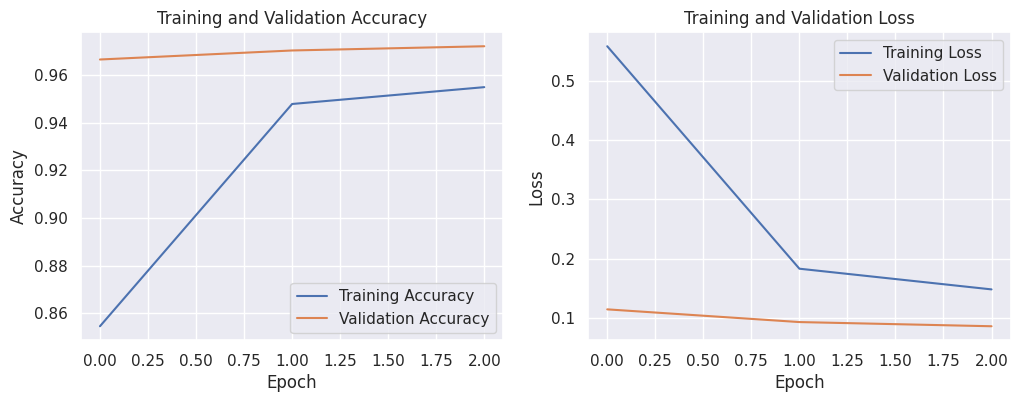

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Use 'accuracy' and 'val_accuracy' for accuracy metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create plots for accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Following is our prediction:
1/1 [==============================] - 0s 19ms/step


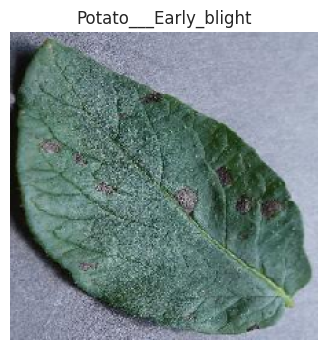

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/data/plant/test/test/PotatoEarlyBlight3.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
# Make predictions on the validation set
predictions = classifier.predict(valid_set)

98/98 [==============================] - 31s 311ms/step


In [ ]:
from sklearn.metrics import accuracy_score

true_labels = valid_set.classes
predicted_labels = predictions.argmax(axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.035539510629763335
